# A Network Tour of Data Science
### &nbsp; &nbsp; &nbsp; Xavier Bresson, Winter 2016/17
## Exercise 4 - Code 1 : Graph Science
## Construct Network of Text Documents  

In [1]:
# Load libraries

# Math
import numpy as np

# Visualization 
%matplotlib notebook 
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import ndimage

# Print output of LFR code
import subprocess

# Sparse matrix
import scipy.sparse
import scipy.sparse.linalg

# 3D visualization
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot

# Import data
import scipy.io

# Import functions in lib folder
import sys
sys.path.insert(1, 'lib')

# Import helper functions
%load_ext autoreload
%autoreload 2
from lib.utils import compute_ncut
from lib.utils import reindex_W_with_classes
from lib.utils import nldr_visualization
from lib.utils import construct_knn_graph
from lib.utils import compute_purity

# Import distance function
import sklearn.metrics.pairwise

# Remove warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load 10 classes of 4,000 text documents
mat = scipy.io.loadmat('datasets/20news_5classes_raw_data.mat')
X = mat['X']
n = X.shape[0]
d = X.shape[1]
Cgt = mat['Cgt'] - 1; Cgt = Cgt.squeeze()
nc = len(np.unique(Cgt))
print('Number of data =',n)
print('Data dimensionality =',d);
print('Number of classes =',nc);

Number of data = 2000
Data dimensionality = 7939
Number of classes = 5


**Question 1a:** Compute the k-NN graph (k=10) with L2/Euclidean distance<br>
Hint: You may use the function *W=construct_knn_graph(X,k,'euclidean')*

In [3]:
k =10
W=construct_knn_graph(X,k,'euclidean')
W

k-NN graph with euclidean distance


<2000x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 36778 stored elements in Compressed Sparse Row format>

**Question 1b:** Plot the adjacency matrix of the graph. <br>
Hint: Use function *plt.spy(W, markersize=1)*

<IPython.core.display.Javascript object>


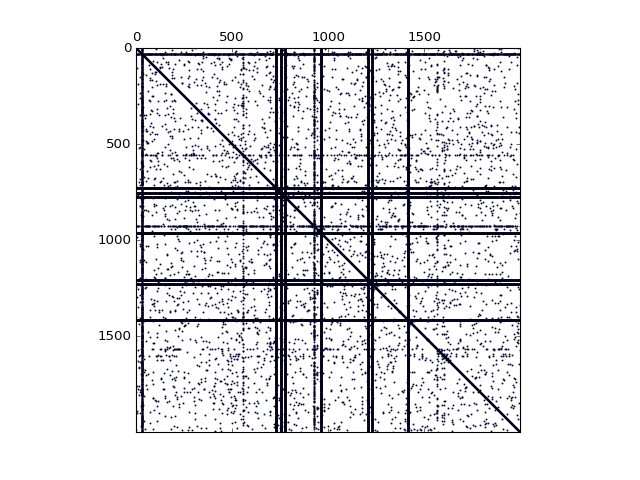

In [4]:
plt.spy(W, markersize=1)

**Question 1c:** Reindex the adjacency matrix of the graph w.r.t. ground
truth communities. Plot the reindexed adjacency matrix of the graph.<br>
Hint: You may use the function *[W_reindex,C_classes_reindex]=reindex_W_with_classes(W,C_classes)*.

In [5]:
[W_reindex,C_classes_reindex]=reindex_W_with_classes(W,Cgt)

<IPython.core.display.Javascript object>


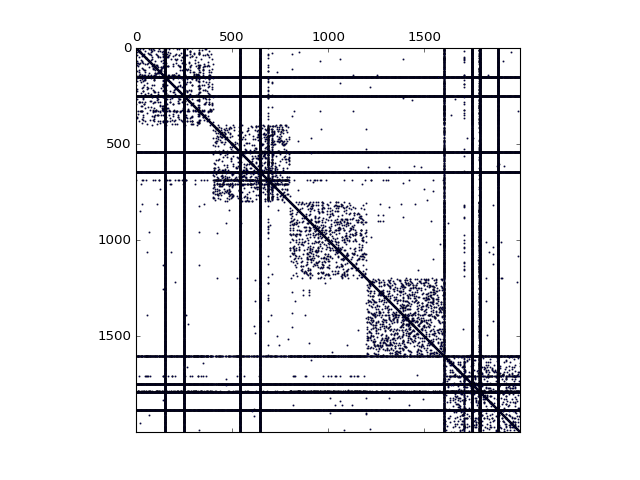

In [6]:
# Your code here
plt.figure(2)
plt.spy(W_reindex, markersize=1)

**Question 1d:** Perform graph clustering with NCut technique. What is
the clustering accuracy of the NCut solution? What is the clustering
accuracy of a random partition? Reindex the adjacency matrix of the
graph w.r.t. NCut communities. Plot the reindexed adjacency matrix of
the graph.<br>
Hint: You may use function *C_ncut, accuracy = compute_ncut(W,C_solution,n_clusters)* that performs Ncut clustering.<br>
Hint: You may use function *accuracy = compute_purity(C_computed,C_solution,n_clusters)* that returns the
accuracy of a computed partition w.r.t. the ground truth partition. A
random partition can be generated with the function *np.random.randint*.

74.25
22.15


<IPython.core.display.Javascript object>


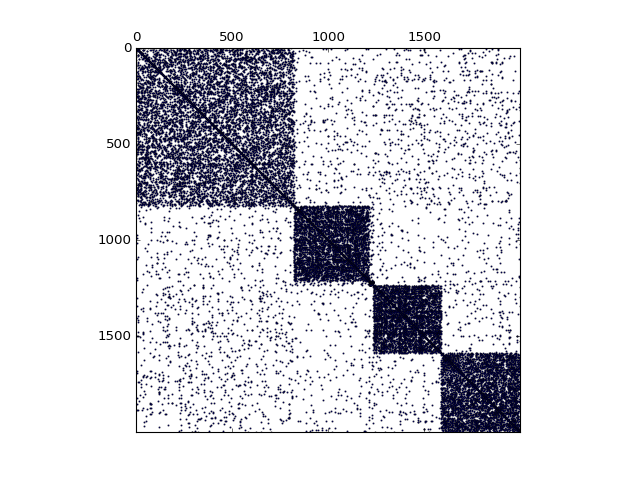

In [25]:
C_ncut, accuracy = compute_ncut(W,Cgt,nc)
print(accuracy)

randpart = np.random.randint(5,size=2000)
C_ncut_rand, accuracy_rand = compute_ncut(W_reindex,randpart,nc)
print(accuracy_rand)

[W_reindex_NCut,C_classes_reindex]=reindex_W_with_classes(W,C_ncut)
plt.figure(3)
plt.spy(W_reindex_NCut, markersize=1)

**Question 2a:** Compute the k-NN graph (k=10) with Cosine distance.<br>
Answer to questions 1b-1d for this graph.<br>
Hint: You may use function *W=construct_knn_graph(X,10,'cosine')*.

In [8]:
# Reload data matrix
X = mat['X']

In [21]:
W=construct_knn_graph(X,10,'cosine') # Compute the k-NN graph with Cosine distance


k-NN graph with cosine distance


<IPython.core.display.Javascript object>


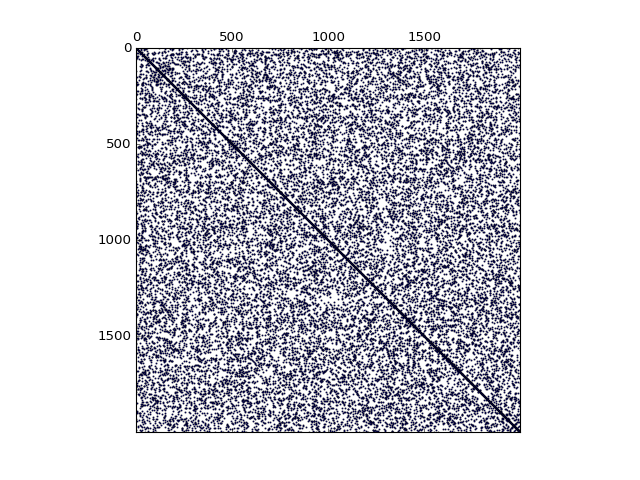

In [22]:
# Your code here
plt.figure(4)
plt.spy(W, markersize=1)

<IPython.core.display.Javascript object>


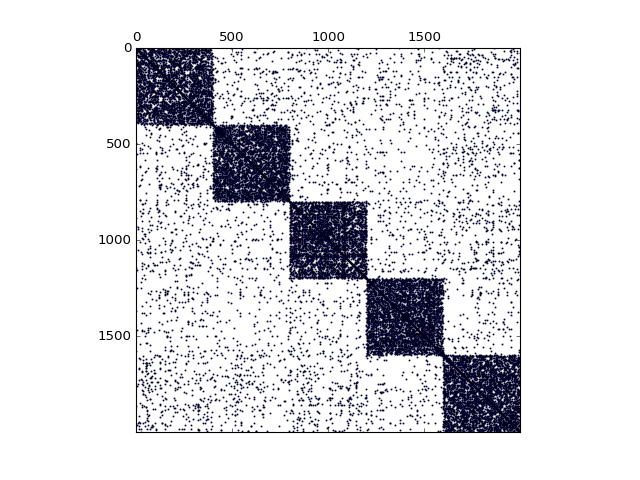

In [23]:
# Your code here
[W_reindex,C_classes_reindex]=reindex_W_with_classes(W,Cgt)
plt.figure(5)
plt.spy(W_reindex, markersize=1)

In [ ]:
# Your code here


**Question 2b:** Visualize the adjacency matrix with the non-linear reduction
technique in 2D and 3D. <br>
Hint: You may use function *[X,Y,Z] = nldr_visualization(W)*.<br>
Hint: You may use function *plt.scatter(X,Y,c=Cncut)* for 2D visualization and *ax.scatter(X,Y,Z,c=Cncut)* for 3D visualization.

37.95


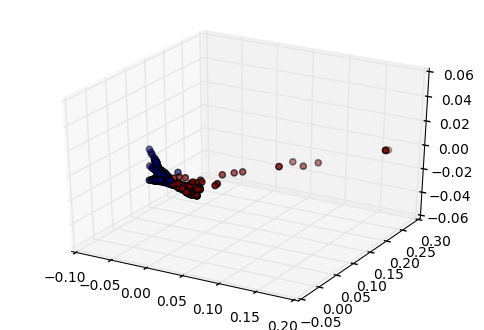

In [28]:
[X,Y,Z] = nldr_visualization(W)
Cncut,acc = compute_ncut(W, Cgt, 2)
print(acc)
%matplotlib inline
fig = plt.figure(2)
ax = fig.gca(projection='3d')
plt.scatter(X,Y,c=Cncut)

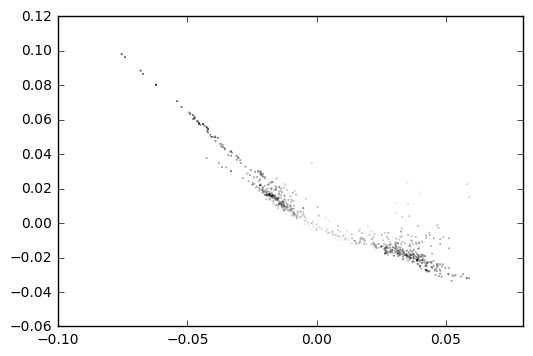

In [29]:
%matplotlib inline
plt.scatter(X,Y,Z,c=Cncut)